In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
pip install sqlalchemy

     ---------------------------------------- 2.0/2.0 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 192.5/192.5 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\sandy\AppData\Local\Temp\ipykernel_25868\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_data_point

('2017-08-23',)

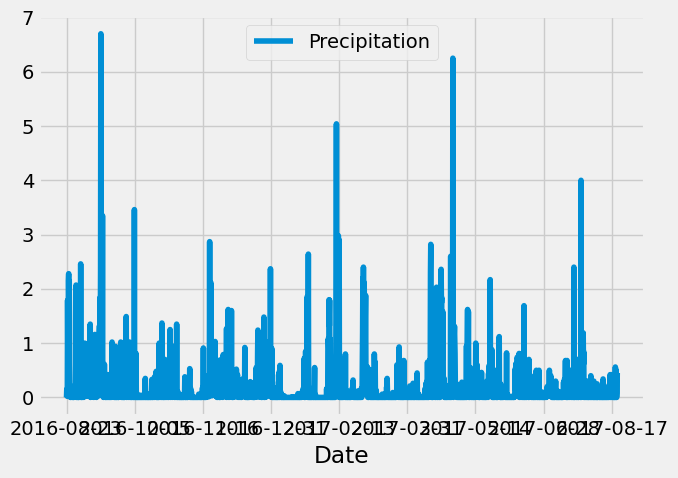

In [19]:


year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
year_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= year_ago, Measurement.prcp != None).\
order_by(Measurement.date).all()
df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.plot(figsize=(7,5))
plt.tight_layout()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
#session.query(Measurement.station).group_by(Measurement.station).count()
session.query(Measurement.station).distinct().count()
            

9

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
result

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.tobs).\
      filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()

In [27]:
df1 = pd.DataFrame(year_temp, columns=['Tobs'])
df1.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


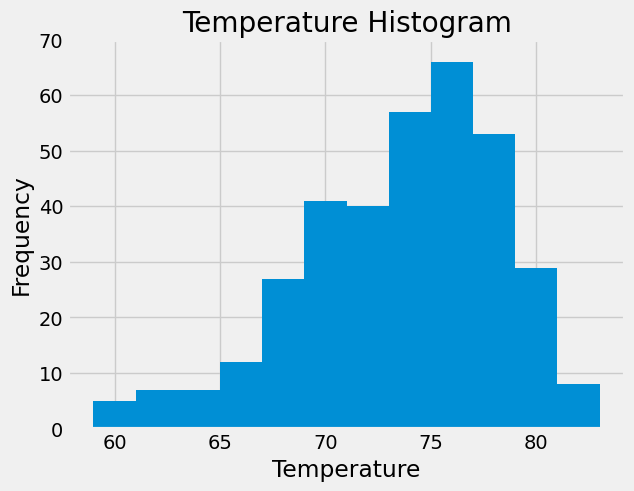

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data and have a DataFrame named df1

bins = 12
# Replace 'year_temp' with the correct column name from your DataFrame
df1['Tobs'].plot.hist(bins=bins)

plt.ylim(0, 70)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')
plt.show()

# Close Session

In [32]:
# Close Session
session.close()